In [14]:




# Python3 code for preprocessing text 
import nltk 
import re 
import numpy as np 
  
# execute the text here as : 
text = """ Beans. I was trying to explain to somebody as we were flying in, that’s corn.  That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commencement.  """ 
dataset = nltk.sent_tokenize(text) 
for i in range(len(dataset)): 
    dataset[i] = dataset[i].lower() 
    dataset[i] = re.sub(r'\W', ' ', dataset[i]) 
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]) 

We will first preprocess the data, in order to:

Convert text to lower case.
Remove all non-word characters.
Remove all punctuations.

In [15]:
print(dataset)

[' beans ', 'i was trying to explain to somebody as we were flying in that s corn ', 'that s beans ', 'and they were very impressed at my agricultural knowledge ', 'please give it up for amaury once again for that outstanding introduction ', 'i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here ', 'i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have ', 'and it s great to see you governor ', 'i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today ', 'and i am deeply honored at the paul douglas award that is being given to me ', 'he is somebody who set the path for so much outstanding public service here in illinois ', 'now i want to start by addressing the elephant in the room ', 'i know people are still wondering why i 

In [16]:




# Creating the Bag of Words model 
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [17]:
print(word2count)

{'beans': 2, 'i': 12, 'was': 1, 'trying': 1, 'to': 8, 'explain': 1, 'somebody': 3, 'as': 1, 'we': 2, 'were': 2, 'flying': 1, 'in': 5, 'that': 4, 's': 3, 'corn': 1, 'and': 7, 'they': 1, 'very': 1, 'impressed': 1, 'at': 4, 'my': 1, 'agricultural': 1, 'knowledge': 1, 'please': 1, 'give': 1, 'it': 3, 'up': 1, 'for': 5, 'amaury': 1, 'once': 1, 'again': 1, 'outstanding': 2, 'introduction': 1, 'have': 3, 'a': 2, 'bunch': 1, 'of': 3, 'good': 1, 'friends': 1, 'here': 5, 'today': 2, 'including': 1, 'who': 4, 'served': 1, 'with': 1, 'is': 4, 'one': 1, 'the': 9, 'finest': 1, 'senators': 1, 'country': 1, 're': 1, 'lucky': 1, 'him': 1, 'your': 1, 'senator': 1, 'dick': 1, 'durbin': 1, 'also': 1, 'noticed': 1, 'by': 2, 'way': 1, 'former': 1, 'governor': 2, 'edgar': 1, 'haven': 1, 't': 2, 'seen': 1, 'long': 1, 'time': 1, 'somehow': 1, 'he': 2, 'has': 1, 'not': 1, 'aged': 1, 'great': 1, 'see': 1, 'you': 1, 'want': 2, 'thank': 1, 'president': 1, 'killeen': 1, 'everybody': 1, 'u': 1, 'system': 1, 'making'

In our model, we have a total of 118 words. However when processing large texts, the number of words could reach millions. We do not need to use all those words. Hence, we select a particular number of most frequently used words. To implement this we use:

In [18]:
import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
print(freq_words)

['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who', 'is', 'somebody', 's', 'it', 'have', 'of', 'beans', 'we', 'were', 'outstanding', 'a', 'today', 'by', 'governor', 't', 'he', 'want', 'me', 'was', 'trying', 'explain', 'as', 'flying', 'corn', 'they', 'very', 'impressed', 'my', 'agricultural', 'knowledge', 'please', 'give', 'up', 'amaury', 'once', 'again', 'introduction', 'bunch', 'good', 'friends', 'including', 'served', 'with', 'one', 'finest', 'senators', 'country', 're', 'lucky', 'him', 'your', 'senator', 'dick', 'durbin', 'also', 'noticed', 'way', 'former', 'edgar', 'haven', 'seen', 'long', 'time', 'somehow', 'has', 'not', 'aged', 'great', 'see', 'you', 'thank', 'president', 'killeen', 'everybody', 'u', 'system', 'making', 'possible', 'be', 'am', 'deeply', 'honored', 'paul', 'douglas', 'award', 'being', 'given', 'set', 'path', 'so']


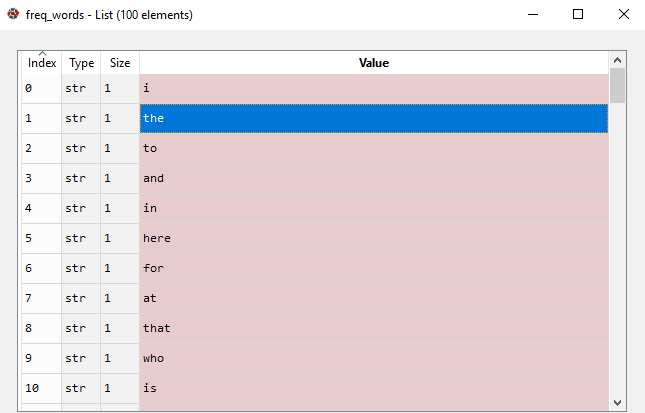

In [19]:
X = [] 
for data in dataset: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector) 
X = np.asarray(X) 

In [20]:
X.shape


(13, 100)

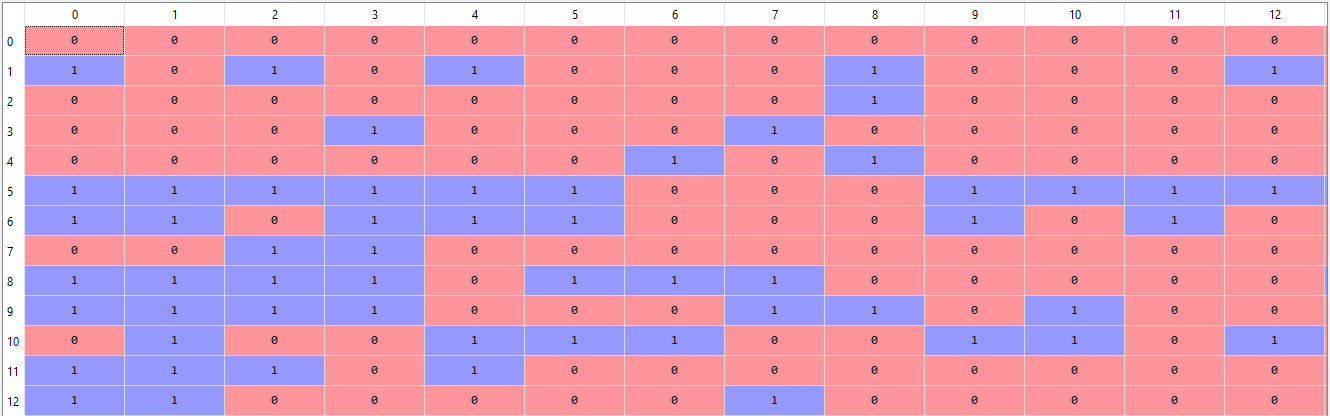

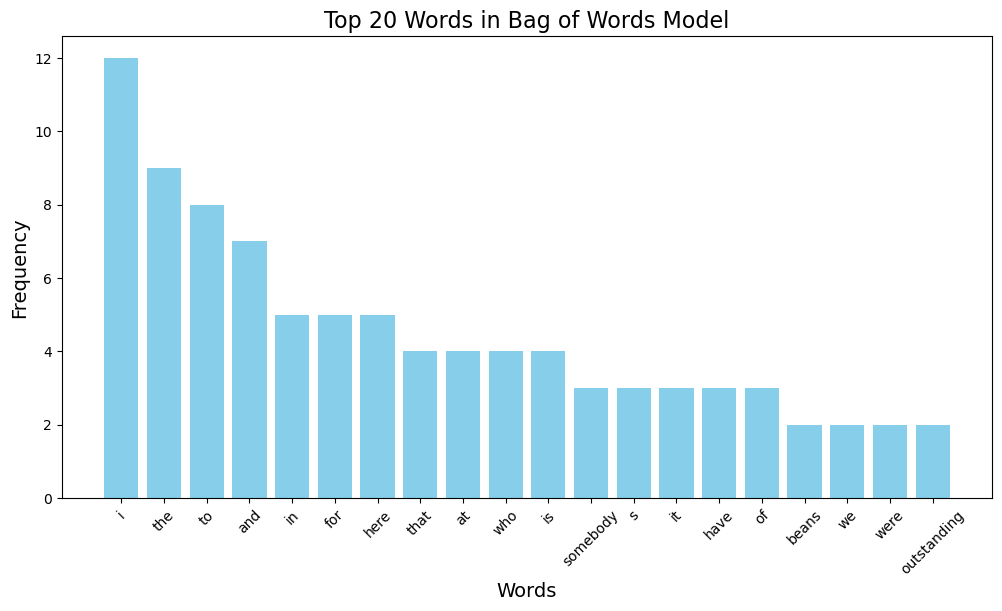

In [21]:
import matplotlib.pyplot as plt

# Extract the top 20 most frequent words and their counts
top_words = heapq.nlargest(20, word2count, key=word2count.get)
top_counts = [word2count[word] for word in top_words]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_counts, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words in Bag of Words Model', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Re-import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = [
    'The cat sat on the mat',
    'The dog ran in the park',
    'The bird sang in the tree'
]

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus into vector of integers:")
print(sequences)

2025-05-05 13:58:58.111567: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746453539.000169   28357 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746453539.078766   28357 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746453540.017119   28357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746453540.017205   28357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746453540.017211   28357 computation_placer.cc:177] computation placer alr

After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [24]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
y = to_categorical(targets, num_classes=vocab_size)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1746453551.303444   28357 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746453553.207437   28757 service.cc:152] XLA service 0x7f81f4019480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746453553.207548   28757 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-05 13:59:13.310321: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746453554.007046   28757 cuda_dnn.cc:529] Loaded

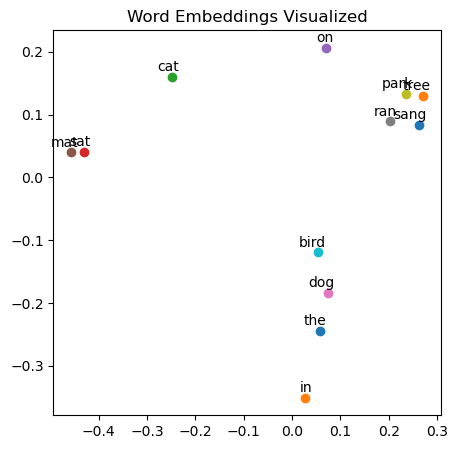

In [25]:
# Extract the embeddings
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for word, idx in tokenizer.word_index.items():
    x, y = reduced_embeddings[idx]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualized")
plt.show()